In [120]:
import pandas as pd
import numpy as np 
pd.set_option('display.max_columns', None)

In [121]:
df = pd.read_csv("/Users/karandeepsonewane/Projects/Option Pricing using Neural Network/Notebooks/option_chain_with_vix.csv")

In [122]:
df.sort_values(by="snapshot_date")

,Unnamed: 0,optionSymbol,expiration,dte,intrinsicValue,extrinsicValue,strike,bid,ask,mid,underlyingPrice,spot_price,snapshot_date,volume,inTheMoney,t_ann,M,VIX,C,C/K,sigma
0,0,SPY250103C00300000,1735938900,1.0,284.64,0.335,300.0,284.36,285.59,284.975,584.64,584.64,2025-01-02,0,True,0.002740,0.667214,NaN,284.975,0.949917,0.1735
2943,2943,SPY250103C00330000,1735938900,1.0,254.64,0.340,330.0,254.38,255.58,254.980,584.64,584.64,2025-01-02,0,True,0.002740,0.571904,NaN,254.980,0.772667,0.1735
2944,2944,SPY250103C00340000,1735938900,1.0,244.64,0.355,340.0,244.38,245.61,244.995,584.64,584.64,2025-01-02,0,True,0.002740,0.542051,NaN,244.995,0.720574,0.1735
2945,2945,SPY250103C00350000,1735938900,1.0,234.64,0.355,350.0,234.38,235.61,234.995,584.64,584.64,2025-01-02,0,True,0.002740,0.513063,NaN,234.995,0.671414,0.1735
2946,2946,SPY250103C00360000,1735938900,1.0,224.64,0.350,360.0,224.39,225.59,224.990,584.64,584.64,2025-01-02,0,True,0.002740,0.484892,NaN,224.990,0.624972,0.1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257874,1257874,SPY281215C01300000,1860527700,1046.0,0.00,0.885,1300.0,0.84,0.93,0.885,689.53,689.53,2026-02-03,5,False,2.865753,-0.634109,NaN,0.885,0.000681,0.1744
1257873,1257873,SPY281215C01310000,1860527700,1046.0,0.00,0.840,1310.0,0.79,0.89,0.840,689.53,689.53,2026-02-03,0,False,2.865753,-0.641772,NaN,0.840,0.000641,0.1744
1257872,1257872,SPY281215C01320000,1860527700,1046.0,0.00,0.800,1320.0,0.75,0.85,0.800,689.53,689.53,2026-02-03,1,False,2.865753,-0.649377,NaN,0.800,0.000606,0.1744
1257880,1257880,SPY281215C01240000,1860527700,1046.0,0.00,1.240,1240.0,1.19,1.29,1.240,689.53,689.53,2026-02-03,1,False,2.865753,-0.586856,NaN,1.240,0.001000,0.1744


In [123]:
## Contract level aggregation 
contract_level = df.groupby(["optionSymbol"]).agg(
    total_volume = ('volume', 'sum'),
    avg_M = ('M', 'mean'),
    num_snapshots = ('optionSymbol', 'size'),
    num_trading_days = ('snapshot_date', 'nunique'),
    avg_dte = ('dte', 'mean'),
    expiration = ('expiration', 'first')
)
contract_level.reset_index()


,optionSymbol,total_volume,avg_M,num_snapshots,num_trading_days,avg_dte,expiration
0,SPY250103C00300000,0,0.667214,1,1,1.000000,1735938900
1,SPY250103C00310000,0,0.634424,1,1,1.000000,1735938900
2,SPY250103C00320000,0,0.602675,1,1,1.000000,1735938900
3,SPY250103C00330000,0,0.571904,1,1,1.000000,1735938900
4,SPY250103C00340000,0,0.542051,1,1,1.000000,1735938900
...,...,...,...,...,...,...,...
47010,SPY281215C01310000,1,-0.639423,19,19,1059.631579,1860527700
47011,SPY281215C01320000,5,-0.647027,19,19,1059.631579,1860527700
47012,SPY281215C01330000,310,-0.654575,19,19,1059.631579,1860527700
47013,SPY281215C01340000,409,-0.662065,19,19,1059.631579,1860527700


In [124]:
non_zero_vol_con = contract_level[contract_level["total_volume"] != 0]
non_zero_vol_con.reset_index()

,optionSymbol,total_volume,avg_M,num_snapshots,num_trading_days,avg_dte,expiration
0,SPY250103C00415000,6,0.342718,1,1,1.000000,1735938900
1,SPY250103C00485000,30,0.186847,1,1,1.000000,1735938900
2,SPY250103C00490000,1,0.176591,1,1,1.000000,1735938900
3,SPY250103C00495000,1,0.166439,1,1,1.000000,1735938900
4,SPY250103C00500000,3,0.156388,1,1,1.000000,1735938900
...,...,...,...,...,...,...,...
35601,SPY281215C01310000,1,-0.639423,19,19,1059.631579,1860527700
35602,SPY281215C01320000,5,-0.647027,19,19,1059.631579,1860527700
35603,SPY281215C01330000,310,-0.654575,19,19,1059.631579,1860527700
35604,SPY281215C01340000,409,-0.662065,19,19,1059.631579,1860527700


In [ ]:
# moneyness buckets based on average M
bins = [-np.inf, -0.1, -0.05, 0.05, 0.1, np.inf]  
labels = ['deep OTM', 'OTM', 'ATM', 'ITM', 'deep ITM']
contract_level['moneyness_buckets'] = pd.cut(
    contract_level['avg_M'], 
    bins=bins, 
    labels=labels
)

# Step 3: Aggregate by moneyness bucket
stats = contract_level.groupby('moneyness_buckets', observed=True).agg(
    unique_contracts=('optionSymbol', 'count'),
    total_volume=('total_volume', 'sum'),
    avg_snapshots=('num_snapshots', 'mean'),
    avg_trading_days=('num_trading_days', 'mean')
)

stats['pct_contracts'] = stats['unique_contracts'] / stats['unique_contracts'].sum() * 100
stats['pct_volume'] = stats['total_volume'] / stats['total_volume'].sum() * 100
stats['volume_per_contract'] = stats['total_volume'] / stats['unique_contracts']

print(stats)

                   unique_contracts  total_volume  avg_snapshots  \
moneyness_buckets                                                  
deep OTM                       5225      25914152      40.855502   
OTM                            3686      38008535      23.558600   
ATM                           18497     348125051      17.899173   
ITM                            5915       6760301      22.610313   
deep ITM                      13692       3453130      36.261174   

                   avg_trading_days  pct_contracts  pct_volume  \
moneyness_buckets                                                
deep OTM                  40.855502      11.113474    6.136996   
OTM                       23.558600       7.840051    9.001191   
ATM                       17.899173      39.342763   82.443065   
ITM                       22.610313      12.581091    1.600976   
deep ITM                  36.261174      29.122620    0.817771   

                   volume_per_contract  
moneyness_buckets  

In [126]:
# How long are contracts tracked
print(f"ATM contracts tracked for {stats.loc['ATM', 'avg_trading_days']:.1f} days on average")
print(f"Deep ITM contracts tracked for {stats.loc['deep ITM', 'avg_trading_days']:.1f} days on average")

# Volume concentration
print(f"Top moneyness bucket by volume: {stats['pct_volume'].idxmax()}")
print(f"Captures {stats['pct_volume'].max():.1f}% of total volume")

# Liquidity ratio
stats['liquidity_ratio'] = stats['volume_per_contract'] / stats['volume_per_contract'].max()

ATM contracts tracked for 17.9 days on average
Deep ITM contracts tracked for 36.3 days on average
Top moneyness bucket by volume: ATM
Captures 82.4% of total volume


In [127]:
# 1. Cumulative volume distribution
contract_level_sorted = contract_level.sort_values('total_volume', ascending=False)
contract_level_sorted['cumulative_volume_pct'] = (
    contract_level_sorted['total_volume'].cumsum() / 
    contract_level_sorted['total_volume'].sum() * 100
)

# How many contracts capture 90% of volume?
n_contracts_90pct = (contract_level_sorted['cumulative_volume_pct'] <= 90).sum()
print(f"{n_contracts_90pct} contracts ({n_contracts_90pct/len(contract_level)*100:.1f}%) capture 90% of volume")

# 2. Volume-weighted average moneyness (should be near 0)
volume_weighted_M = (
    contract_level['avg_M'] * contract_level['total_volume']
).sum() / contract_level['total_volume'].sum()
print(f"Volume-weighted average M: {volume_weighted_M:.4f}")

# 3. Gini coefficient of volume concentration
from numpy import cumsum, sum as npsum
volumes_sorted = contract_level['total_volume'].sort_values().values
n = len(volumes_sorted)
gini = (2 * npsum((np.arange(n) + 1) * volumes_sorted)) / (n * npsum(volumes_sorted)) - (n + 1) / n
print(f"Volume Gini coefficient: {gini:.3f}  (1.0 = perfect inequality)")

7100 contracts (15.1%) capture 90% of volume
Volume-weighted average M: -0.0210
Volume Gini coefficient: 0.881  (1.0 = perfect inequality)


In [128]:
df.groupby("snapshot_date")["expiration"].nunique().describe()


count    272.000000
mean      31.676471
std        1.489854
min       28.000000
25%       31.000000
50%       32.000000
75%       33.000000
max       37.000000
Name: expiration, dtype: float64

#### SPY Market-Microstructre
#### EDA

In [ ]:
df["snapshot_date"] = pd.to_datetime(df["snapshot_date"])
print(f"Date range: {df["snapshot_date"].min()} - {df["snapshot_date"].max()}")
print(f"total trading days: {df["snapshot_date"].nunique()}")

Date range: 2025-01-02 00:00:00 - 2026-02-03 00:00:00
total trading days: 272


In [ ]:
## Contract level aggregation 
contract_level = df.groupby(["optionSymbol"]).agg(
    total_volume = ('volume', 'sum'),
    avg_M = ('M', 'mean'),
    num_snapshots = ('snapshot_date', 'nunique'),
    num_trading_days = ('snapshot_date', 'nunique'),
    expiration_nunique=("expiration", "nunique"),
    avg_dte = ('dte', 'mean'),
    expiration = ('expiration', 'first')
)
contract_level.reset_index()
contract_level

,total_volume,avg_M,num_snapshots,num_trading_days,expiration_nunique,avg_dte,expiration
optionSymbol,,,,,,,
SPY250103C00300000,0,0.667214,1,1,1,1.000000,1735938900
SPY250103C00310000,0,0.634424,1,1,1,1.000000,1735938900
SPY250103C00320000,0,0.602675,1,1,1,1.000000,1735938900
SPY250103C00330000,0,0.571904,1,1,1,1.000000,1735938900
SPY250103C00340000,0,0.542051,1,1,1,1.000000,1735938900
...,...,...,...,...,...,...,...
SPY281215C01310000,1,-0.639423,19,19,1,1059.631579,1860527700
SPY281215C01320000,5,-0.647027,19,19,1,1059.631579,1860527700
SPY281215C01330000,310,-0.654575,19,19,1,1059.631579,1860527700


In [ ]:
# day to expiry distribution 
df["dte"] = pd.to_numeric(df["dte"], errors="coerce")

# buckets 
bins = [0, 7, 30, 90, 252, 756, np.inf]
labels = ["0-7d", "8-30d", "31-90d", "91-252d", "253-756d", ">756d"]

volume_by_dte = (df.groupby(pd.cut(df["dte"], bins=bins, labels=labels))["volume"].sum()).rename("Total_Vol_over_obs")
volume_share = ((volume_by_dte / volume_by_dte.sum()) * 100).rename("pct_vol")
vol_table = pd.concat([volume_by_dte, volume_share], axis=1).reset_index()
vol_table

/var/folders/_v/vfbxc80973l9zq3s4w559dzm0000gn/T/ipykernel_58090/2581481320.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_by_dte = (df.groupby(pd.cut(df["dte"], bins=bins, labels=labels))["volume"].sum()).rename("Total_Vol_over_obs")


,dte,Total_Vol_over_obs,pct_vol
0,0-7d,298742223,70.748211
1,8-30d,71176296,16.855989
2,31-90d,32008892,7.580354
3,91-252d,13399837,3.173353
4,253-756d,6467715,1.531686
5,>756d,466206,0.110407


In [ ]:
## monyness 
# buckets 
bins_m = [-np.inf, -0.2, -0.05, 0.05, 0.2, np.inf]  
labels_m = ['deep OTM', 'OTM', 'ATM', 'ITM', 'deep ITM']

volume_by_moneyness = (df.groupby(pd.cut(df["M"], bins=bins_m, labels=labels_m))["volume"].sum()).rename("Total_Vol_over_obs")
volume_pct = ((volume_by_moneyness / volume_by_moneyness.sum()) * 100).rename("pct_vol")
vol_mn_table = pd.concat([volume_by_moneyness, volume_pct], axis=1).reset_index()
vol_mn_table

/var/folders/_v/vfbxc80973l9zq3s4w559dzm0000gn/T/ipykernel_58090/3898979006.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_by_moneyness = (df.groupby(pd.cut(df["M"], bins=bins_m, labels=labels_m))["volume"].sum()).rename("Total_Vol_over_obs")


,M,Total_Vol_over_obs,pct_vol
0,deep OTM,5991466,1.418901
1,OTM,36921085,8.743661
2,ATM,370297540,87.693960
3,ITM,7549387,1.787848
4,deep ITM,1501691,0.355631


In [ ]:
df = df[(df["ask"] >= df["bid"]) & df["bid"].notna() & df["ask"].notna()]

# Absolute spread
df["spread_abs"] = df["ask"] - df["bid"]

# Relative spread (scale-free; preferred for comparisons)
# Use mid if available, else (ask+bid)/2
mid = df["mid"] if "mid" in df.columns else (df["ask"] + df["bid"]) / 2
df["spread_rel"] = df["spread_abs"] / mid
df["M_bucket"] = pd.cut(df["M"], bins=bins_m, labels=labels_m, include_lowest=True)
df["DTE_bucket"] = pd.cut(df["dte"], bins=bins, labels=labels, include_lowest=True)

spread_by_M = (
    df.groupby("M_bucket")["spread_rel"]
      .agg(median="median", p25=lambda x: x.quantile(0.25), p75=lambda x: x.quantile(0.75), count="size")
      .reset_index()
)

spread_by_M

spread_by_DTE = (
    df.groupby("DTE_bucket")["spread_rel"]
      .agg(median="median", p25=lambda x: x.quantile(0.25), p75=lambda x: x.quantile(0.75), count="size")
      .reset_index()
)

spread_by_DTE



/var/folders/_v/vfbxc80973l9zq3s4w559dzm0000gn/T/ipykernel_58090/4008210758.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("M_bucket")["spread_rel"]
/var/folders/_v/vfbxc80973l9zq3s4w559dzm0000gn/T/ipykernel_58090/4008210758.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("DTE_bucket")["spread_rel"]


,DTE_bucket,median,p25,p75,count
0,0-7d,0.026589,0.011083,0.285714,191472
1,8-30d,0.015773,0.006192,0.048709,238218
2,31-90d,0.012285,0.006137,0.025798,228050
3,91-252d,0.011696,0.007178,0.020429,288862
4,253-756d,0.014134,0.009008,0.024724,255512
5,>756d,0.020264,0.012741,0.036337,59502


In [ ]:
pivot = (
    df.pivot_table(
        index="DTE_bucket",
        columns="M_bucket",
        values="spread_rel",
        aggfunc="median"           # for robustness 
    )
)

pivot

/var/folders/_v/vfbxc80973l9zq3s4w559dzm0000gn/T/ipykernel_58090/11027764.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


M_bucket,deep OTM,OTM,ATM,ITM,deep ITM
DTE_bucket,,,,,
0-7d,2.000000,2.000000,0.019417,0.028516,0.012624
8-30d,2.000000,0.666667,0.009693,0.017561,0.011098
31-90d,0.666667,0.045455,0.005797,0.015537,0.011380
91-252d,0.181818,0.016000,0.007249,0.009852,0.012070
253-756d,0.051282,0.008538,0.012912,0.010971,0.012852
>756d,0.041995,0.011181,0.039294,0.028582,0.014180


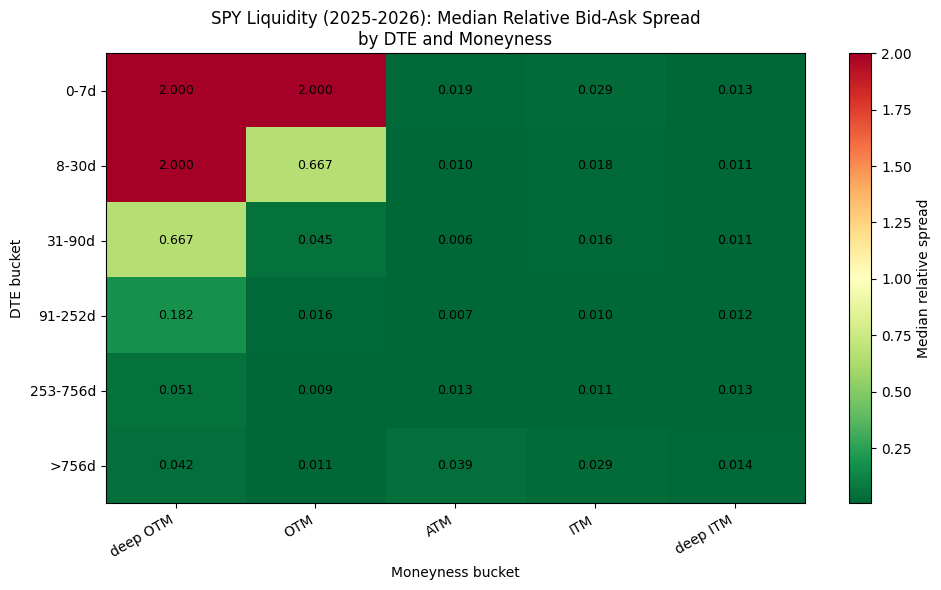

In [ ]:
# index = DTE_bucket, columns = M_bucket, values = median(spread_rel)
fig, ax = plt.subplots(figsize=(10, 6))
data = pivot.values.astype(float)

# heatmap
im = ax.imshow(data, aspect="auto", cmap="RdYlGn_r")

ax.set_xticks(np.arange(pivot.shape[1]))
ax.set_yticks(np.arange(pivot.shape[0]))
ax.set_xticklabels(pivot.columns)
ax.set_yticklabels(pivot.index)


plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Median relative spread")

# Annotate each cell with the value
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        val = pivot.iloc[i, j]
        if np.isfinite(val):
            ax.text(j, i, f"{val:.3f}", ha="center", va="center", fontsize=9)

# Titles and labels
ax.set_title("SPY Liquidity (2025-2026): Median Relative Bid-Ask Spread\nby DTE and Moneyness")
ax.set_xlabel("Moneyness bucket")
ax.set_ylabel("DTE bucket")

plt.tight_layout()
plt.show()
